In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import codecs
from PIL import Image

# set random seed
np.random.seed(123)

In [2]:
# data directory
data_dir = os.path.join(
    "data",
    "gtsrb-german-traffic-sign",
    "Train"
)

# print folders in data directory
print(os.listdir(data_dir))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9', 'test.txt', 'train.txt', 'val.txt']


In [3]:
# signs (store in sorted format, so use range instead of os.listdir())
signs = list(map(str, range(0, 42 + 1)))
# number of samples
num_samples = list(map(lambda s: len(os.listdir(os.path.join(data_dir, s))), signs))

print('total number of samples:', sum(num_samples))


total number of samples: 39209


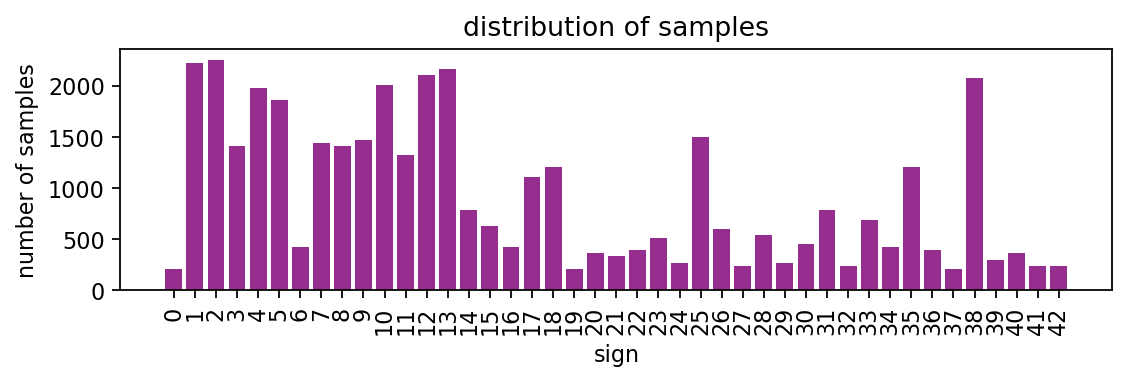

In [4]:
# plot
plt.figure(figsize=(8, 2), dpi=160)
plt.bar(range(1, len(signs) + 1), num_samples, color='xkcd:warm purple')
plt.xticks(range(1, len(signs) + 1), signs, rotation=90)
plt.xlabel('sign')
plt.ylabel('number of samples')
plt.title('distribution of samples')
plt.show()

In [5]:
# create only five groups: 'A', 'B', 'C', 'D', 'E'

groupA = [0, 1, 2, 3, 4, 5, 7, 8]
groupB = [6, 9, 10, 16, 23, 29, 32, 41, 42]
groupC = [14, 15, 17, 18, 22, 25, 30, 31]
groupD = [11, 12, 13, 19, 20, 21, 24, 26, 27, 28]
groupE = [33, 34, 35, 36, 37, 38, 39, 40]

assert len(
    set.union(
    set(groupA),
    set(groupB),
    set(groupC),
    set(groupD),
    set(groupE)
    )) == len(signs)

In [6]:
# method to display pics in a group
def show_pics_in_group(group_list, group_name):
    fig, axs = plt.subplots(nrows=3, ncols=4, dpi=160)
    # turn off axis
    for row in range(3):
        for col in range(4):
            axs[row, col].axis('off')
    # initialize row, col to zero
    row, col = 0, 0
    for orig_class_id in group_list:
        image = Image.open(
        os.path.join(
            "data",
            "gtsrb-german-traffic-sign",
            "Meta",
            f"{orig_class_id}.png"
            )
        )
        axs[row, col].imshow(image)
        # update row, col
        row = row + 1 if col + 1 == 4 else row
        col = (col + 1) % 4
    plt.suptitle(group_name)
    plt.show()

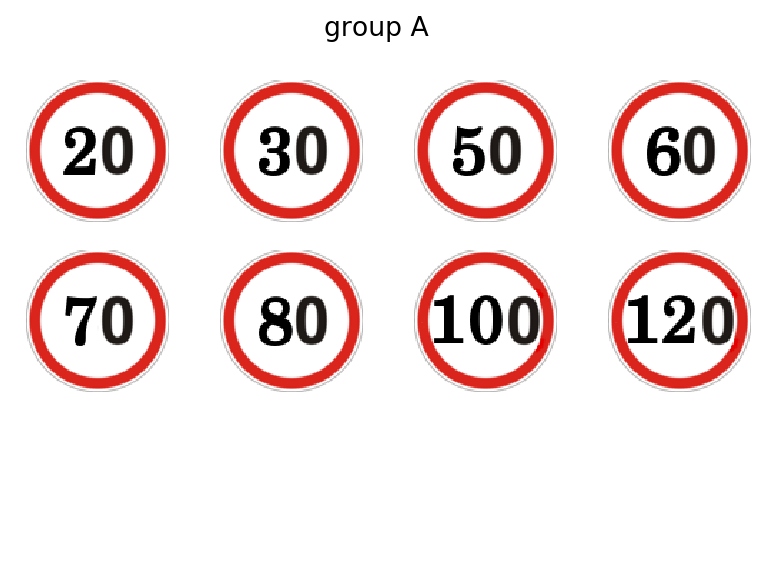

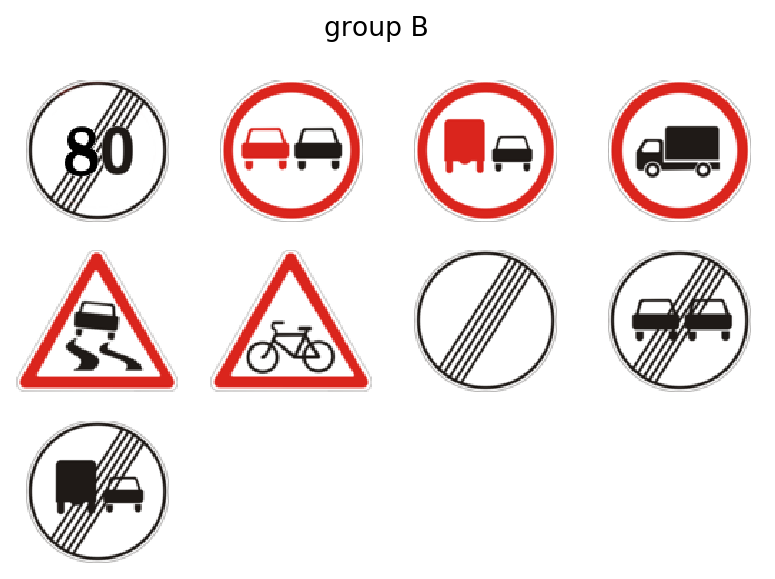

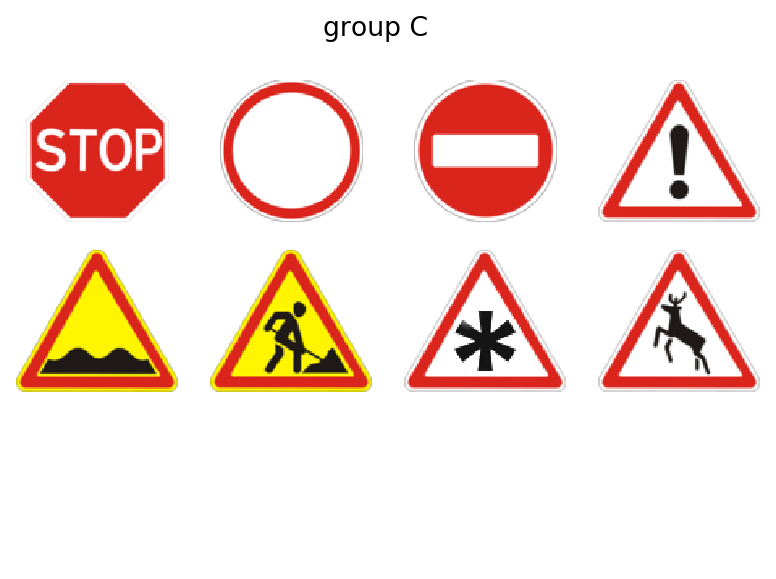

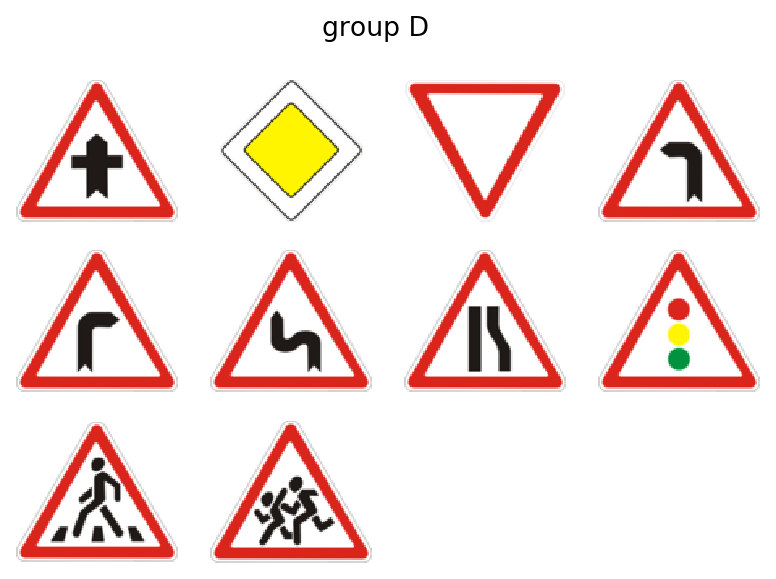

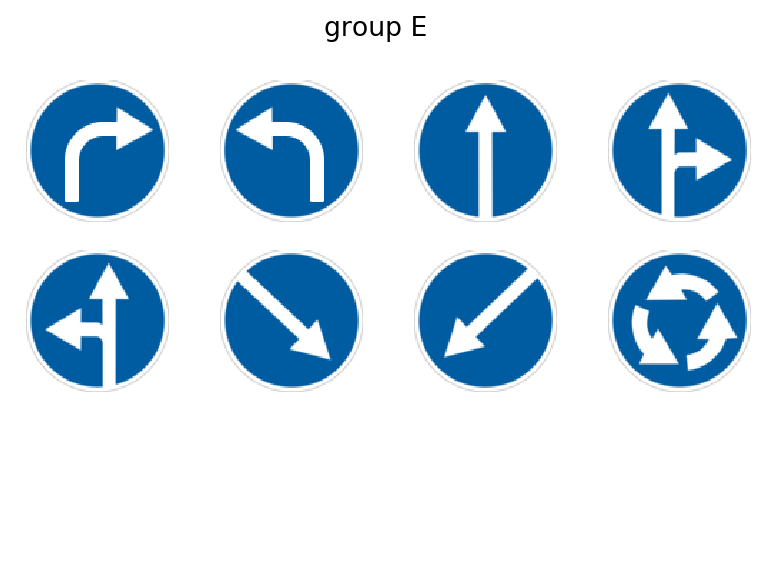

In [7]:
show_pics_in_group(groupA, 'group A')
show_pics_in_group(groupB, 'group B')
show_pics_in_group(groupC, 'group C')
show_pics_in_group(groupD, 'group D')
show_pics_in_group(groupE, 'group E')

In [8]:
def get_num_samples(orig_class_ids):
    return sum(map(lambda id: num_samples[id], orig_class_ids))

In [9]:
# print number of samples in each group
print('number of samples:')
print('group A', get_num_samples(groupA))
print('group B', get_num_samples(groupB))
print('group C', get_num_samples(groupC))
print('group D', get_num_samples(groupD))
print('group E', get_num_samples(groupE))

number of samples:
group A 12780
group B 5820
group C 6840
group D 8130
group E 5639


In [10]:
# get image filenames
image_filenames = list(map(lambda s: os.listdir(os.path.join(data_dir, s)), signs))

# add directory to filenames (not complete path)
for orig_class_id in range(len(image_filenames)):
    image_filenames[orig_class_id] = list(map(lambda s: f'{orig_class_id}/{s}', image_filenames[orig_class_id]))

# put filenames in groups 'A', 'B', 'C', 'D', 'E'
image_filenames_groups = {
    'group A': [], 
    'group B': [],
    'group C': [],
    'group D': [],
    'group E': []
}
for orig_class_id in groupA:
    image_filenames_groups['group A'].extend(image_filenames[orig_class_id])

for orig_class_id in groupB:
    image_filenames_groups['group B'].extend(image_filenames[orig_class_id])

for orig_class_id in groupC:
    image_filenames_groups['group C'].extend(image_filenames[orig_class_id])

for orig_class_id in groupD:
    image_filenames_groups['group D'].extend(image_filenames[orig_class_id])

for orig_class_id in groupE:
    image_filenames_groups['group E'].extend(image_filenames[orig_class_id])


In [11]:
assert len(image_filenames_groups['group A']) ==\
       get_num_samples(groupA), 'something is wrong'

assert len(image_filenames_groups['group B']) ==\
       get_num_samples(groupB), 'something is wrong'

assert len(image_filenames_groups['group C']) ==\
       get_num_samples(groupC), 'something is wrong'

assert len(image_filenames_groups['group D']) ==\
       get_num_samples(groupD), 'something is wrong'

assert len(image_filenames_groups['group E']) ==\
       get_num_samples(groupE), 'something is wrong'

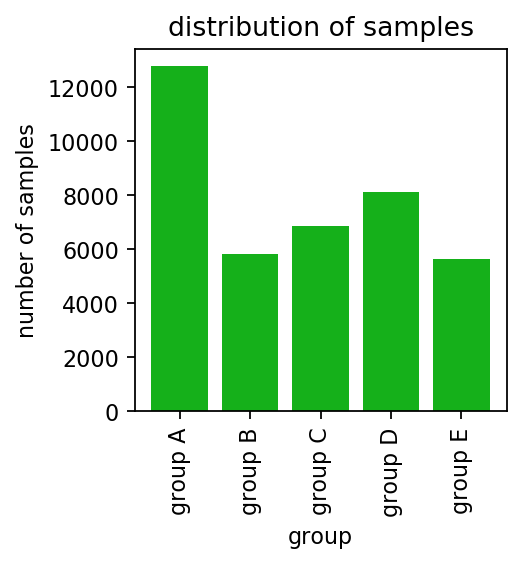

In [12]:
# plot
plt.figure(figsize=(3, 3), dpi=160)
plt.bar(range(len(image_filenames_groups)),
        list(map(lambda g: len(g), 
                 image_filenames_groups.values())
             ),
        color='xkcd:green')
plt.xticks(range(len(image_filenames_groups)),
           image_filenames_groups.keys(),
           rotation=90)
plt.xlabel('group')
plt.ylabel('number of samples')
plt.title('distribution of samples')
plt.show()

In [13]:
# randomly shuffle the samples in each group
for group_name in image_filenames_groups:
    np.random.shuffle(image_filenames_groups[group_name])

# pick equal number from each group to avoid data imbalance
# (pick only 5240 samples from each group)
image_filenames_groups_5240 = {}

for group_name in image_filenames_groups:
    image_filenames_groups_5240[group_name] = image_filenames_groups[group_name][:5240]


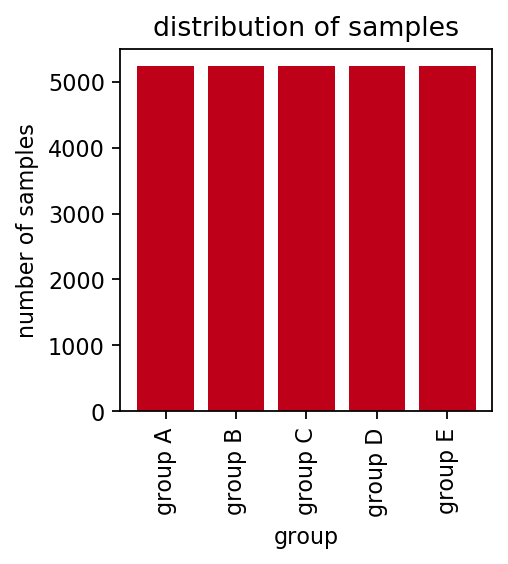

In [14]:
# plot
plt.figure(figsize=(3, 3), dpi=160)
plt.bar(range(len(image_filenames_groups_5240)),
        list(map(lambda g: len(g), 
                 image_filenames_groups_5240.values())
             ),
        color='xkcd:scarlet')
plt.xticks(range(len(image_filenames_groups_5240)),
           image_filenames_groups_5240.keys(),
           rotation=90)
plt.xlabel('group')
plt.ylabel('number of samples')
plt.title('distribution of samples')
plt.show()

In [15]:
# split into train, val, test and get filepaths
data_filepaths = {'train': [], 'val': [], 'test': []}

# for each class..
for group_name in image_filenames_groups_5240:
    
 

  # test split
  data_filepaths['test'].extend(
      list(map(
          lambda s: os.path.join(data_dir, s),
           image_filenames_groups_5240[group_name][:40]
           )))
  
  # val split
  data_filepaths['val'].extend(
      list(map(
          lambda s: os.path.join(data_dir, s),
           image_filenames_groups_5240[group_name][40:240]
           )))
  
  # train split
  data_filepaths['train'].extend(
      list(map(
          lambda s: os.path.join(data_dir, s),
           image_filenames_groups_5240[group_name][240:]
           )))

In [16]:
print('number of samples:')
for key in data_filepaths:
  print(f'{key}: {len(data_filepaths[key])}')

number of samples:
train: 25000
val: 1000
test: 200


In [17]:
# write to files
for key in data_filepaths:
  with codecs.open(f'{data_dir}/{key}.txt', 'w', encoding='utf-8') as f:
    for filepath in data_filepaths[key]:
      f.write(filepath + '\n')
print('wrote to files')

wrote to files
